<a href="https://colab.research.google.com/github/Ron256/SimmilarityOfXRDData/blob/main/similarityOfXRDData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Ronaldlee Ejalu

CSC 695 Independent Study

MS - Data Science Student


***Supervised by:***

*Roselyne Barreto Tchoua, PhD. Assistant Professor*

*Jarvis College of Computing & Digital Media (CDM)*

*DePaul University*


# Similarity of XRD Data 
X ray Diffraction data Data science is intrinsically inter-disciplinary; however, end-users of machine learning models are not always trained data scientists. On the other hand, it is crucial that these models be infused with domain knowledge in order to increase explainability and trust in their output. Our ultimate goal is to assign domain-aware confidence scores to help domain experts make informed decisions. Our hypothesis is that given confidence scores, end-users will be more willing to trust and adopt machine learning models. We test this hypothesis with materials informatics, a field that has the potential to greatly reduce time-to-market and development costs for new materials as it leverages machine learning and large datasets for targeted design. For example, automated phase-mapping seeks to discover samples of materials mixture with similar structure. This is challenging because measurements per sample far exceed the number of samples to cluster making it difficult to interpret and generalize. Towards this goal, we have developed a system for comparing and contrasting clustering methods and discover the “best” number of clusters based on agreements between the different methods. Parallelly, we have recently explored repurposing a clustering metric as a measure of uncertainty to help differentiate between “easy” and “hard” cases in classification and clustering. This follow up independent study will continue to explore this novel uncertainty metric as a way to refocus the problem on finding the boundaries of the phase regions (samples with similar structure).

  I began my exploration by loading data from the Matlab file, which was loaded into a python dictionary with following keys:
*   C - these are composition percentages (percentages of all the samples)
*   XY – these are the actual coordinates where these samples are physically located, it is like a round overall material.
*   X – these are the y coordinates of the XRD data. 
*   T – This is a list of list with the x coordinates since the data is defined in angles and intensity.
To get useful insights from the data set, I carried out exploratory data analysis by graphing Ternary Scatterplot using both the compositions and long labels which were supplied as argument parameters to the plot_ternary_fegapd helper function. You could see the clearly defined compositions colored by the phases they are associated with.
With the use of a list compression, I prepared the data for pre-processing and plotting and the results were saved in the coordinate_list variable, which is a list of list.  
By using matplotlib library, I generated sample signals with ground truth labels. I used the 10 cluster ground truth labels with the goal of understanding how the signals were associated with each cluster label, however, for the purpose of our research, we only focused a 5 cluster ground truth labels. 
Using a 5 cluster ground truth labels, I generated histograms to show the distribution of each phase or class labels and observed that none of the clusters were normally distributed.

After understanding how the distribution of each phase was laid out, I went ahead and derived both the positive and negative pairs. Starting with the derivation of the negative pairs, I used a for loop per phase, randomly selecting a signal from phase 1, then randomly selecting any signal from any other phase but not 1. I repeated the same process for phase 2 , where I randomly selected a signal from phase 2, then randomly selected any signal from any other phase but not 2. So, using this approach I ended up creating 200 negative pairs  from each of the following combinations:

* Phase 1 - phase 2 
* Phase 1 - phase 3
*   Phase 1 - phase 4
*   Phase 1 - phase 5
*   Phase 2 - phase 3
*   Phase 2 -  phase 4
*   Phase 2 - phase 5
*   Phase 3 - phase 4
*   Phase 3 - phase 5
*   Phase 4 - phase 5

In total, this approach generated approximately 2000 negative pairs. 
For the positive pairs, 400 pairs were generated from the same phase regions; with XRD data, I would want to make sure I have positive pairs from all phases, for example, positive pairs of phase 1, positive pairs of phase 2, positive pairs of phase 3, positive pairs of phase 4, positive pairs of phase 5. In total, approximately 2000 positive pairs would be generated. I implemented  a validation step to avoid duplicate positive and negative pairs. Using a  loop, I went ahead to create png images without labels, titles, and grid out of the XRD sample data which were saved to the file system. Please note that coordinate_list[0] and coordinate_list[1:] are the x coordinates and  y coordinates of the samples respectively. Again, within a for loop, I loaded all images within the google drive file system and converted them into gray scale before transforming each image into a NumPy array and saving the transformed arrays to a list of XRD images, which was translated into a Numpy array and reshaped to get an array with the expected dimensions of 256 * 256 pixels. Using a for a loop,  I accessed the positive and negative pairs and, on each iteration, I loaded pixel data for both images and the corresponding labels which were appended to the different lists, imagePairs and pos_neg_labels respectively before transforming those lists into Numpy arrays. 

  To minimize the variance and ensure that the model will generalize well to new, unseen data points, I used the numpy.random.permutation method to shuffle the data in the image pairs and positive negative labels arrays. Using the sklearn model selection package, I randomly selected 70% of the shuffled negative and positive signal pairs for training and remaining 30% for testing. I generated a total of 2,478 signals  for training and 1063 signals for testing. With the data transformed into the right format, I created and compiled a Convolutional Neural Network with three layers and using 50 epochs, used the network model to fit the training data with it getting the training and validation accuracy of 99%. This is the accuracy attained on predicting similarity.  Initially, both training and validation accuracy was very low, so I added more CNN layers along with a dense layer to improve the accuracy scores.  I then used the network’s model to generate the embedding of the analysis that I used to plot a scatterplot representing the embeddings learned from the network and these were colored by the 5 phase of the signals used.  Also, using k = 5 as the number of neighbors, I initiated the KNN classifier object then fit, and predict the learned embeddings, generating an accuracy of 99% and this confirms the features’ efficacy. 

  I ran spectral clustering on the embeddings and applied the homogeneity, completeness, and silhouette scores to the results. Homogeneity score is a metric of a cluster labeling given a ground truth where the clustering result satisfies homogeneity if all its clusters contain only data points which are members of a single class.  Completeness score is a clustering metric where the result satisfies completeness if all the data points that are members of a given class are elements of the same cluster.  To compute the quality of each cluster, I used silhouette score, which measured how similar the samples signals are to their own clusters and compared to other clusters. Using k = 2, 3, 4, 5, 6, and 7, **k = 5** clearly stands out with well defined clusters. The silhouette coefficients for all the clusters are above the average with both completeness and homogeneity score approaching 1.  Beyond 5, you get undefined clusters with noise.

**Future work**: So, at k=5, I would  compute the uncertainty score  and explore ways of highlighting the hard cases, which will help the material scientists to differentiate between easy and hard cases.

## Import packages

In [ ]:
from sklearn.manifold import TSNE
import collections
import numpy as np
import scipy.io as spio
import sys
import math
import plotly.graph_objects as go
np.set_printoptions(threshold=sys.maxsize)

import matplotlib.pyplot as plt
get_ipython().magic(u'matplotlib inline')
plt.style.use('ggplot')

In [ ]:
!pip install ipyvolume
import ipyvolume as ipv
from scipy.signal import find_peaks
import numpy as np
import sys
import matplotlib.pyplot as plt
from numpy import percentile
import pandas as pd
import math
from sklearn.metrics import silhouette_score, accuracy_score, homogeneity_score, completeness_score
from sklearn.metrics import silhouette_samples, silhouette_score
!pip install yellowbrick
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.cluster import KMeans
from scipy.spatial import distance
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import SpectralClustering
import statistics
from statistics import mean, stdev
# from matching.games import StableMarriage
from scipy.spatial.distance import directed_hausdorff
from sklearn.preprocessing import MinMaxScaler
# import ternary
import plotly.graph_objects as go
import json
from IPython.display import HTML
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
'''Trains a Siamese MLP on pairs of digits from the MNIST dataset.
It follows Hadsell-et-al.'06 [1] by computing the Euclidean distance on the
output of the shared network and by optimizing the contrastive loss (see paper
for mode details).
# References
- Dimensionality Reduction by Learning an Invariant Mapping
    http://yann.lecun.com/exdb/publis/pdf/hadsell-chopra-lecun-06.pdf
Gets to 97.2% test accuracy after 20 epochs.
2 seconds per epoch on a Titan X Maxwell GPU
'''
from __future__ import absolute_import
from __future__ import print_function

import random
from keras.models import Model
from keras.layers import Input, Flatten, Dense, Dropout, Lambda
#!pip install RMSprop
#from keras.optimizers import RMSprop
#!pip install SDG
import tensorflow as tf

from tensorflow.keras import optimizers

from keras import backend as K
from keras.layers.convolutional import Conv2D
from keras.layers.pooling import MaxPooling2D, AveragePooling2D

num_classes = 5
epochs = 50

In [ ]:
# obtain reproducible results
import random as python_random
def reset_seeds():
   np.random.seed(123) 
   python_random.seed(123)
   tf.random.set_seed(1234)

reset_seeds() 

## Helper functions

In [ ]:
def cluster_sizes(clusters):
    #clusters is an array of cluster labels for each instance in the data
    
    size = {}
    cluster_labels = np.unique(clusters)
    print(cluster_labels)
    n_clusters = cluster_labels.shape[0]
    print('n_clusters %s' %n_clusters)

    for c in cluster_labels:
        size[c] = len(embeddings[clusters == c])
    return size


def euclidean_distance(vects):
    x, y = vects
    sum_square = K.sum(K.square(x - y), axis=1, keepdims=True)
    return K.sqrt(K.maximum(sum_square, K.epsilon()))


def eucl_dist_output_shape(shapes):
    shape1, shape2 = shapes
    return (shape1[0], 1)


def contrastive_loss(y_true, y_pred):
    '''Contrastive loss from Hadsell-et-al.'06
    http://yann.lecun.com/exdb/publis/pdf/hadsell-chopra-lecun-06.pdf
    uses y_true as Y and y_pred as the Euclidean distance between dissimilar points
    '''
    margin = 1
    y_true = K.cast(y_true, 'float32')
    y_pred = K.cast(y_pred, 'float32')

    sqaure_pred = K.square(y_pred)
    margin_square = K.square(K.maximum(margin - y_pred, 0))
    return K.mean(y_true * sqaure_pred + (1 - y_true) * margin_square)


def compute_accuracy(y_true, y_pred):
    '''Compute classification accuracy with a fixed threshold on distances.
    '''
    pred = y_pred.ravel() < 0.5
    return np.mean(pred == y_true)


def accuracy(y_true, y_pred):
    '''Compute classification accuracy with a fixed threshold on distances.
    '''
    return K.mean(K.equal(y_true, K.cast(y_pred < 0.5, y_true.dtype)))

# Silhouette plot 
def silhouette_plt(y_sc, silhouette_vals,  numclusters, indicator):
  """Function that plots the Silhouette plot"""
    cluster_labels = np.unique(y_sc)
    #n_clusters = cluster_labels.shape[0]
    ax_lower, ax_upper = 0, 0
    cticks = []
    sil_plot = plt.figure()
    for i, k in enumerate(cluster_labels):
        c_silhouette_vals = silhouette_vals[y_sc == k]
        c_silhouette_vals.sort()
        ax_upper += len(c_silhouette_vals)
        color = plt.jet()
        plt.barh(range(ax_lower, ax_upper), c_silhouette_vals, height=1.0, 
                         edgecolor='none', color=color)
        cticks.append((ax_lower + ax_upper) / 2)
        ax_lower += len(c_silhouette_vals)
    silhouette_avg = np.mean(silhouette_vals)
    plt.axvline(silhouette_avg, color="red", linestyle="--") 
    plt.yticks(cticks, cluster_labels)
    plt.ylabel('Cluster', fontsize=12)
    plt.xlabel('Silhouette coefficient', fontsize=12)
    if indicator == 0:
        str2 = 'Unscaled Silhouette Plot For {} Clusters'.format(numclusters)
    else:
        str2 = 'Min-Max Silhouette Plot For {} Clusters'.format(numclusters)
    plt.title(str2, fontsize = 15)
    plt.tight_layout()
    plt.show()
    return silhouette_avg


In [ ]:
def create_base_network(input_shape):
  """Function that creates and compiles the SCNN model"""
  
  input = Input(shape=input_shape)
  x = input

  x = Conv2D(32, kernel_size=3, activation='relu', input_shape=input_shape,padding='same')(x)
  #x= tf.keras.layers.AveragePooling2D()(x)
  x= tf.keras.layers.MaxPooling2D((2,2))(x)

  #x = Conv2D(32, kernel_size=3, activation='relu', padding='same')(x)
  #x= tf.keras.layers.AveragePooling2D()(x)

  # 56
  x = Conv2D(56, kernel_size=3, activation='relu', padding='same')(x)
  x= tf.keras.layers.MaxPooling2D((2,2))(x)
  # 32
  x = Conv2D(64, kernel_size=3, activation='relu', padding='same')(x)
  #x= tf.keras.layers.AveragePooling2D()(x)
  x= tf.keras.layers.MaxPooling2D((2,2))(x)

  # reshapping the input
  x = Flatten()(x)
  #x = Dropout(0.1)(x)
  x = Dense(128, activation='relu')(x) # try to see if I end with  128 

  #x = Dense(2, activation='softmax')(x)
  
  x = Lambda(lambda  x: K.l2_normalize(x,axis=1))(x)

  return Model(input, x)

In [ ]:
def generatePosNegPairs(mergedL_without_duplicates, similar):
  """Function that returns a list of generated signals with assigned labels"""

  signalsL = []
  labels = []
  for num in range(len(mergedL_without_duplicates)):
    if 'similar' == similar:
      # access the positive signals using the generated pair of indicies
      signal_pair = coordinate_list[mergedL_without_duplicates[num][0]], coordinate_list[mergedL_without_duplicates[num][1]]

      # convert the tuple into numpy array
      #signal_pair_arr = np.asarray(signal_pair).astype(np.float32)
      signal_pair_arr = np.asarray(signal_pair)
      #print('shape of  signal_pair_arr: %s' %str((signal_pair_arr.shape)))

      # for debugging purposes
      # print('type of signal_pair : %s' %type(signal_pair))
      # signalsLabels_L = [signal_pair, 1]

      signalsL.append((signal_pair_arr, 1))
    else:
      # access the negative signals using the generated pair of indicies
      signal_pair = coordinate_list[mergedL_without_duplicates[num][0]], coordinate_list[mergedL_without_duplicates[num][1]]
      
      # convert the tuple into a numpy array
      # signalsLabels_arr = np.asarray(signal_pair).astype(np.float32)
      signalsLabels_arr = np.asarray(signal_pair)
      signalsL.append((signalsLabels_arr, 0))

    # return the list
  return signalsL

In [ ]:
def generateUnique(listofLabels):
  """Function that returns a unique number of a list"""
  labels_numpy = np.array(listofLabels)

  return (np.unique(labels_numpy))

In [ ]:
def parse_label_file(label_file_path):
  """Function that Parse Bunn and Long label files of FeGaPd dataset: 
returns a dictionary of the form: {8: [1, 2, 9, ...], 9: [3, 4, 5 ...], 10: [14, 16, 17, ...]...}
"""
    label_list = []
    label_file = open(label_file_path)
    lines = label_file.readlines()
    for line in lines:
        stripped_line = line.rstrip('\n')
        label_list.append(int(stripped_line))
    label_file.close()
    
    clusterSamples = {}
   
    for sample_idx in range(len(label_list)):
        sample_number = sample_idx + 1
        cluster_number = label_list[sample_idx]
        
        if (cluster_number not in clusterSamples):
            clusterSamples[cluster_number] = [sample_number]
        else:
            clusterSamples[cluster_number].append(sample_number)
    return clusterSamples

In [ ]:
# Plots normalized ternary plot for fegapd dataset
# compositions is a list of lists of all compositions
def plot_ternary_fegapd(compositions, clusters, highlighted_clusters = None): 
  """Function that plots normalized ternary plot for fegapd dataset"""
    max_fe = max([c[0] for c in compositions])
    max_ga = max([c[1] for c in compositions])
    max_pd = max([c[2] for c in compositions])
    
    min_fe = min([c[0] for c in compositions])
    min_ga = min([c[1] for c in compositions])
    min_pd = min([c[2] for c in compositions])
    
    normalized_comps = []
    for composition in compositions:
        concentration_sum = 0
        Fe = float(composition[0])
        Ga = float(composition[1])
        Pd = float(composition[2])
        concentration_sum = Fe+Ga+Pd
        if concentration_sum < 99:
            print(concentration_sum)
            normalized_comps.append([composition[0], composition[1], composition[2]])
        else:
            normalized_comps.append([math.ceil((float(composition[0])/max_fe)*100), 
                                     math.ceil((float(composition[1])/max_ga)*100), 
                                     math.ceil((float(composition[2])/max_pd)*100)])
    fig = go.Figure()
    colors = ['dodgerblue','yellow', 'red', 'darkblue', 'deeppink', 'black', 'lime', 'cyan', 'lightsteelblue', 'orange', 'silver', 'chocolate']
   
    for color_idx, idx in enumerate(clusters):
        cluster_comps = [compositions[sample_nr-1] for sample_nr in clusters[idx]]
       
        fe_comps = [c[0] for c in cluster_comps]
        ga_comps = [c[1] for c in cluster_comps]
        pd_comps = [c[2] for c in cluster_comps]
        
        if(highlighted_clusters is None):
            color=colors[color_idx % len(colors)]
        else:
            if(idx in highlighted_clusters):
                color = ['red', 'green'][highlighted_clusters.index(idx) % 2]
            else:
                color = 'gray'
        fig.add_traces(go.Scatterternary(a=fe_comps, b=ga_comps, c=pd_comps, mode='markers', marker=go.scatterternary.Marker(color=color), text= f"Cluster {idx}"))
        
    
    fig.update_ternaries(sum=100,aaxis_min= max(min_fe - 5, 0), baxis_min = max(min_ga - 5, 0), caxis_min= max(min_pd - 5, 0))

    fig.update_layout({
        'title': 'Ternary Scatterplot',
        'ternary':
            {
            'sum':100,
            'aaxis':{'title': '<b>Fe</b>'},
            'baxis':{'title': '<b>Ga</b>'},
            'caxis':{'title': '<b>Pd</b>'}
        },
        'showlegend': False
    })
    # # fig.show()
    return fig


In [ ]:
# Plots each sample in a cluster on the same graph for fegapd dataset
def plotOnSameGraph_2(samples, clusterNum, coordinate_list):
  """Function that plots each sample in a cluster on the same graph for fegapd dataset"""
    xcpost = coordinate_list[0]
    _, ax1 = plt.subplots()
    ax1.set_xlabel('Angle')
    ax1.set_ylabel('Intensity')
    ax1.set_title('Post Background Removal: Cluster ' + str(clusterNum))
    ax1.set_ylim([0, 1400])
    
    for sample in samples:
        y1 = coordinate_list[sample]
        # print('y1 : %s' %str(y1))
        y1Arr = np.asarray(y1).astype(float)
        ax1.plot(xcpost, y1Arr)

In [ ]:
def create_pairs(coordinate_list, s_indices):
  """ 
  Function that creates Positive and negative pairs.
  """
  pairs = []
  labels = []
  n = min([len(s_indices[d]) for d in range(num_of_classes)]) - 1
  # n = 23
  for d in range(num_of_classes):
    for i in range(n):
      z1, z2 = s_indices[d][i], s_indices[d][i+1]
      #print(z1, z2)
      pairs += [[coordinate_list[z1], coordinate_list[z2]]]
      #print('pairs : %s' %pairs)
      #print(len(pairs))

      inc = random.randrange(1, num_of_classes)
      #print('inc : %s' %inc)
      dn = (d + inc) % num_of_classes
      z1, z2 = s_indices[d][i], s_indices[d][i] 
      pairs += [[coordinate_list[z1], coordinate_list[z2]]]
      labels += [1, 0]
  return np.array(pairs), np.array(labels)

In [ ]:
def deriveSpectralClustering(embeddings, X_embedded, numOfClusters):
  """
  Function that initializes a spectral cluster with k number of clusters, 
  predicts the embeddings, plots the tsne with the spectral clusters, 
  computes the homogeneity, completeness and silhouette scores
  """
  #colors = ['#f1a340', '#ffffbf', '#998ec3', '#67a9cf', '#7fbf7b', '#a1d76a']
  # colors = {0 : '#f1a340', 1 : '#af8dc3', 2: '#998ec3', 3 : '#67a9cf', 4 : '#7fbf7b', 5 : '#a1d76a'}
  # colors = {0 : '#2700ea', 1 : '#1f77b4', 2 : '#ff7f0e', 3 : '#2ca02c', 4 : '#d62728', 5 : '#9467bd', 6 : '#a52a2a'}
  # colors = {0: '#2ca25f', 1 : '#8856a7', 2: '#43a2ca', 3 : '#ece7f2', 4 : '#1c9099', 5 : '#fec44f'}
  colors = {0: '#2ca25f', 1 : '#8856a7', 2: '#43a2ca', 3 : '#ece7f2', 4 : '#d95f02', 5 : '#fec44f', 6 : '#d8b365'}
  k_L = [numOfClusters] # [2, 3, 4, 5, 6, 7]
  silhouette_total = []
  for k in k_L:
    # print(k)
    sc = SpectralClustering(n_clusters=k, random_state=0)
    # return cluster labels after performing spectral clustering on the embeddings
    y_sc = sc.fit_predict(embeddings)
    print('Number of embeddings used: %s' %str(embeddings.shape[0]))
    
    # plot the tsne with spectral clusters
    tsne_fig = plt.figure(figsize=(10,10))
    for num in range(k):
      inds = np.where(y_sc==num)[0]
      plt.scatter(X_embedded[inds,0], X_embedded[inds,1], alpha=0.5, color=colors[num])
    title_str = 'TSNE Plot with {} Spectral clusters'.format(k)
    plt.title(title_str, fontsize = 15)
    plt.legend(colors, bbox_to_anchor=(1.4, 0.6), title_fontsize = 15).set_title('Legend : Spectral clusters')
    plt.show()
    print('\n\n')
    
    # homogeneity, completeness and v measure
    generated_homogeneity_score = homogeneity_score(xrd_labels_np, y_sc)
    generated_completness_score = completeness_score(xrd_labels_np, y_sc)
    print('generated homogeneity score : %.5f' %generated_homogeneity_score)
    print('generated completness score : %.5f' %generated_completness_score)

    # get the silhouette Score for each k
    silhouette = silhouette_score(embeddings, y_sc, metric = 'euclidean', random_state=9)
    print('silhouette score : %s\n\n' %str(silhouette))

    silhouette_total.append(silhouette) # append the silhouette score to the list

    # First, do all silhouette work on the raw embeddings

    # get the silhouette value per sample
    silhouette_valsb4 = silhouette_samples(embeddings, y_sc, metric='euclidean') 
    # create and save the silhouette plot, and find the average of all of the silhouette scores
    silhouette_avgb4 = silhouette_plt(y_sc, silhouette_valsb4, k, 0) 

    print('\n\n')
    # Function that derives the number of samples for each cluster, 
    # creates a data frame for data analysis and plots a bar chart 
    # to show the representation of the number of samples for each cluster.
    generateSampleCluster_dataframe(y_sc)

In [ ]:
def generateSampleCluster_dataframe(y_sc):
  """
  Function that derives the number of samples for each cluster, 
  creates a data frame for data analysis and plots a bar chart 
  to show the representation of the number of samples for each cluster.
  """

  # the count of the number of occurrences of each phase

  # derive the unique clusters and counts of samples
  unique, counts = np.unique(y_sc, return_counts = True)
  # print('The number of occurrences of each phase: ')
  cluster_samples_np = np.asarray((unique, counts)).T

  # create a data frame storing the number of samples for each cluster
  NoOfSample_per_cluster_df = pd.DataFrame(cluster_samples_np, columns=['Cluster No', 'Number of Samples'])

  #print('\n\n')

  #print(NoOfSample_per_cluster_df.head())

  # sort the data frame in descending order based on the Number of Samples column
  sorted_df = NoOfSample_per_cluster_df.sort_values(by=['Number of Samples'], ascending=False)
  #print(sorted_df.head())
  colors = ['#d95f02']
  plt.bar(range(len(sorted_df['Cluster No'])), sorted_df['Number of Samples'].tolist(), color=colors)
  plt.title('Number of samples per cluster', fontsize = 15)
  plt.xticks(range(len(sorted_df['Cluster No'])), sorted_df['Cluster No'].tolist())
  plt.xlabel('Cluster #', fontsize=12)
  plt.ylabel('Number of Samples', fontsize=12)
  plt.show()
  print('\n')
  print('Number of samples per cluster shown below:')
  print('\n')
  # print the contents of the data frame
  print(NoOfSample_per_cluster_df) 

# mount the drive

In [ ]:
# mount the drive
from google.colab import drive
drive.mount('/gdrive')
#%cd /gdrive

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


# Load data from Matlab file for FeGaPd

In [ ]:
# this data set has the disagreements whether the methodology in this case is applied
temp = spio.loadmat('/gdrive/MyDrive/CSC695/datasets/FeGaPd_XRD_200714a.mat')
print('temp is : %s', type(temp))
cmp = temp['C']
xy = temp['XY'] # these are the coordinates where these samples are physically located .
X = temp['X'] # y coordinates of the XRD data
T = temp['T'] # this is a list of list with the x coordinates. 
labels_col = temp['labels_col']

#print(type(temp))
# What is the meaning of FeGAPd? Is Fe, Ga, Pd different columns
# print('labels_cols : %s' %(type(labels_col)))


temp is : %s <class 'dict'>


In [ ]:
T[0][4]

24.48

## Composition percentages

In [ ]:
# Percentages of all the samples
print(cmp)
#print(len(cmp))
#print(type(cmp)) # There are 278 samples in this particular data set. each of these should be 278

[[0.8216 0.1285 0.0499]
 [0.8286 0.1164 0.055 ]
 [0.8435 0.1006 0.0559]
 [0.852  0.0922 0.0559]
 [0.8556 0.0702 0.0742]
 [0.8476 0.0792 0.0732]
 [0.8442 0.0878 0.068 ]
 [0.8386 0.0954 0.066 ]
 [0.8288 0.1092 0.062 ]
 [0.8189 0.1213 0.0598]
 [0.8033 0.138  0.0587]
 [0.794  0.152  0.054 ]
 [0.7768 0.172  0.0512]
 [0.7579 0.1945 0.0476]
 [0.7031 0.2531 0.0438]
 [0.7247 0.2265 0.0488]
 [0.7431 0.2022 0.0546]
 [0.7584 0.184  0.0575]
 [0.7684 0.1677 0.0639]
 [0.7857 0.1481 0.0662]
 [0.7994 0.1286 0.072 ]
 [0.8084 0.1153 0.0762]
 [0.8124 0.1081 0.0795]
 [0.824  0.0942 0.0818]
 [0.8302 0.084  0.0858]
 [0.8379 0.0739 0.0882]
 [0.8421 0.0667 0.0912]
 [0.8478 0.0588 0.0935]
 [0.8319 0.0587 0.1094]
 [0.8286 0.0624 0.109 ]
 [0.821  0.0711 0.1079]
 [0.8146 0.079  0.1064]
 [0.8152 0.0847 0.1001]
 [0.8069 0.0973 0.0958]
 [0.7962 0.111  0.0928]
 [0.787  0.1246 0.0884]
 [0.7788 0.1397 0.0815]
 [0.7636 0.1592 0.0771]
 [0.7524 0.1756 0.0721]
 [0.739  0.1969 0.0641]
 [0.7166 0.2224 0.061 ]
 [0.7062 0.2401 

## Wafer coordinates

In [ ]:
#print(xy) # these are actual coordinates where the samples are on, it is like around overal  material
print(len(xy)) # these are the coordinates where these samples are physically located .

278


## x coordinates of XRD data

In [ ]:
# Displaying the first 5 elements of the X coordinates. 
T[0][1:5] 

array([24.42, 24.44, 24.46, 24.48])

In [ ]:
print(T[0][1:5]) # a list of list which has the x-coordinate because the data is in angles and intensity
print(len(T[0])) # it is an array of one single data 
# these are the amount of coordinate features. 

[24.42 24.44 24.46 24.48]
1616


## y coordinates of XRD data

In [ ]:
print('X is %s' %type(X))
print(len(X[277])) # 
print(X[277])
#print(len(X[0]))

#print(X[277])
#print(len(X[277])) # y coordinates are labelled as x which is confusing but that is how they are labelled.

X is <class 'numpy.ndarray'>
1616
[9.6544275e+00 1.1446881e+01 1.0782087e+01 1.2551042e+01 1.6147529e+01
 1.1323971e+01 7.6019642e+00 5.8317502e+00 3.1659735e+01 1.2978075e+01
 1.1170245e+01 2.0478543e+01 2.1857790e+01 1.6538656e+01 1.9920485e+01
 2.9890254e+01 1.5710512e+01 6.8052707e-01 5.9419920e+00 1.3792467e+01
 4.9567566e+00 1.0800431e+01 7.4625491e+00 0.0000000e+00 4.0574356e+00
 1.6157201e+01 2.3065884e+01 1.9144505e+01 1.4169562e+01 0.0000000e+00
 6.3440793e-01 4.3608787e-01 7.2518026e+00 1.3593156e+01 7.7844105e+00
 1.1677770e+01 4.4647467e+00 2.3331740e+01 2.7942172e+01 1.3471650e+00
 7.5908550e-01 2.3817945e+00 2.8505600e+01 1.5837532e+01 1.9944820e+01
 1.8632288e+01 1.7883183e+01 1.2790627e+01 6.7571124e-01 0.0000000e+00
 1.7796899e+01 5.8874946e+00 6.1370115e+00 3.0790483e+01 3.8584519e+01
 2.4695969e+01 4.7715248e+00 2.1054075e+01 2.4365145e+01 3.6877830e+01
 2.7298873e+01 9.0818015e+00 5.3398761e+00 8.0239557e+00 3.0448222e+00
 1.4364527e+01 3.1697099e+01 2.7186207e+01 

## Visualize ternary plots and layered graphs for Long and Bunn labels

In [ ]:
# Draw ternary scatterplot with Bunn Labels
# already know ground truth
bunn_labels = parse_label_file("/gdrive/MyDrive/CSC695/datasets/FeGaPd-Bunn.txt")
# bunn_labels 
compositions = [[c[0]*100, c[1]*100, c[2]*100] for c in cmp]
plot_ternary_fegapd(compositions, bunn_labels)

In [ ]:
# Draw ternary scatterplot with Long Labels
long_labels = parse_label_file("/gdrive/MyDrive/CSC695/datasets/FeGaPd-Long.txt")
#long_labels
# compositions is a list of lists of all compositions
plot_ternary_fegapd(compositions, long_labels)

# Prepare data for pre-processing and plotting

In [ ]:
# List of XRD coordinates of form: [[x], [y1], [y2]...] - for plotting purposes
coordinate_list =   [list(T[0])] + [list(l) for l in X] # [list(l) for l in X]
# coordinate_list
# Returns a turple of lists in the form ([x coords], [[sample 1 y coords], [sample 2 y coords]...]) for pre-processing purposes
coordinate_list_preprocessing = (list(T[0]), [list(l) for l in X])
# coordinate_list_preprocessing

# Visualize sample signals with ground truth labels

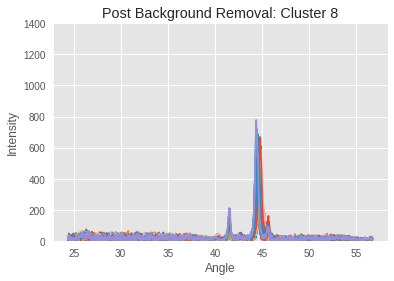

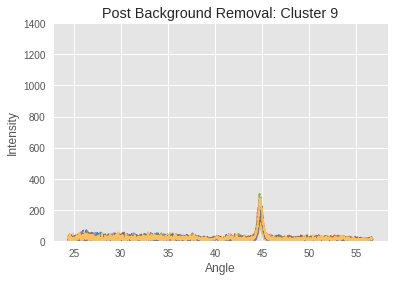

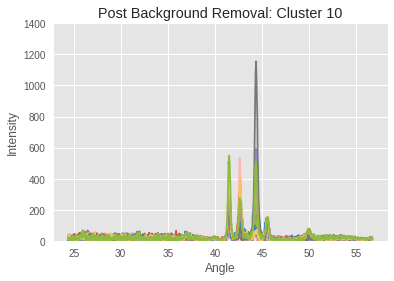

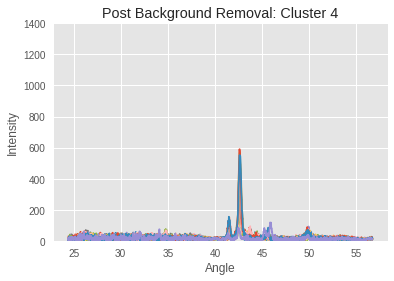

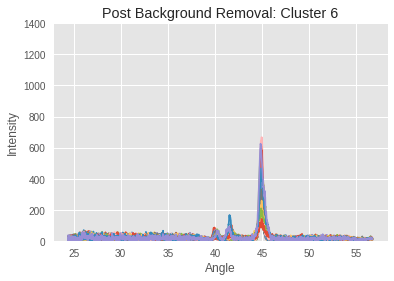

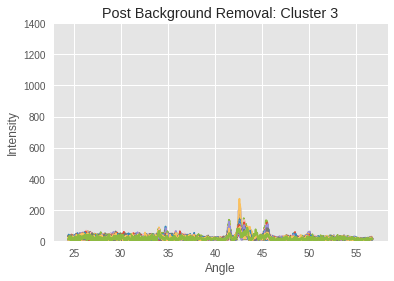

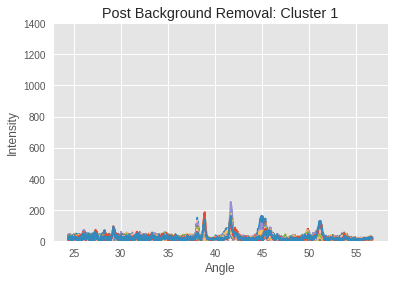

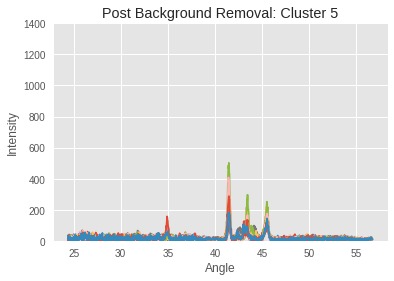

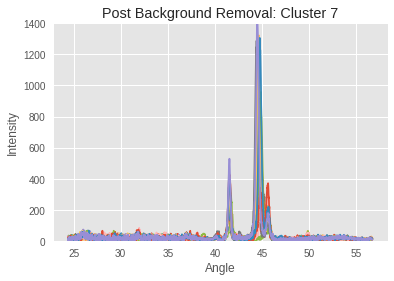

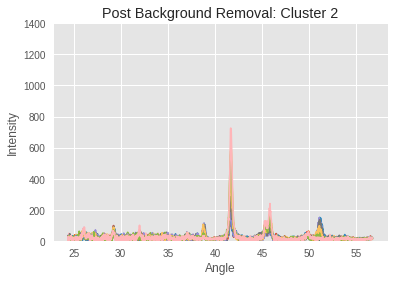

In [ ]:
# 10 cluster ground truth
bunn_labels = parse_label_file("/gdrive/MyDrive/CSC695/datasets/FeGaPd-Bunn.txt")
# bunn_labels
for cluster in bunn_labels:
  # print(cluster)
  plotOnSameGraph_2(bunn_labels[cluster], cluster, coordinate_list)

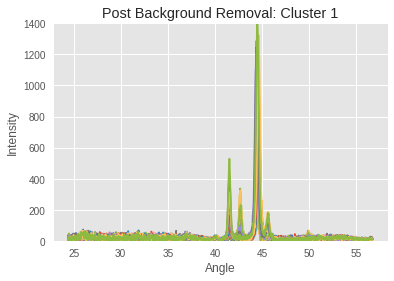

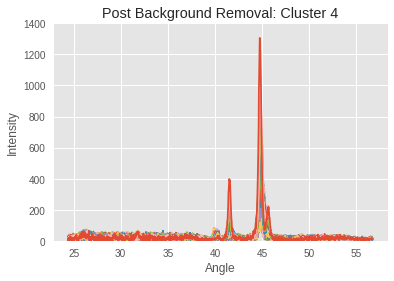

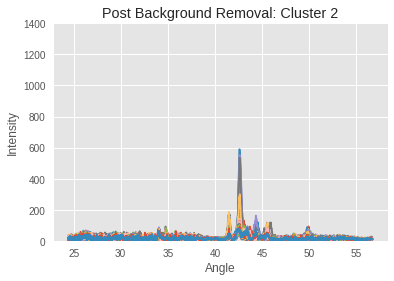

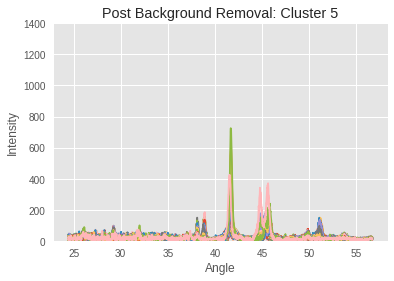

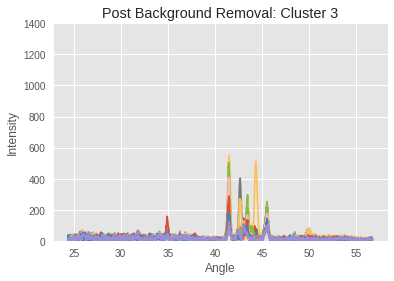

In [ ]:
# 5 cluster ground truth
for cluster in long_labels:
    plotOnSameGraph_2(long_labels[cluster], cluster, coordinate_list)
# we are using a 5 cluster ground truth. 

# Distribution of the class labels using Histogram.

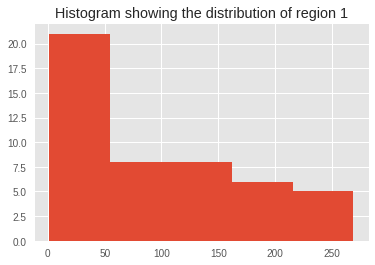

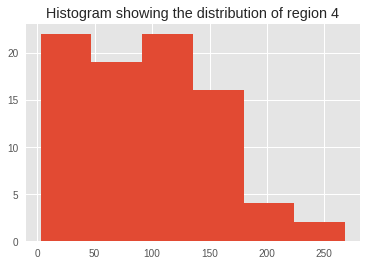

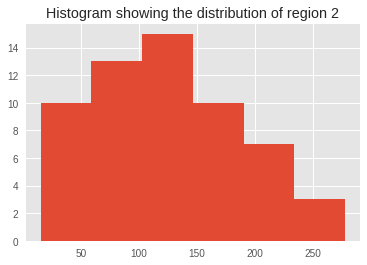

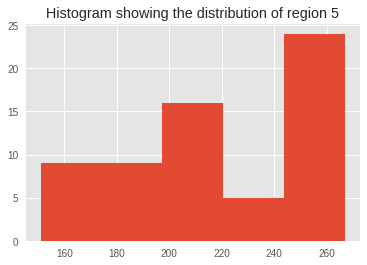

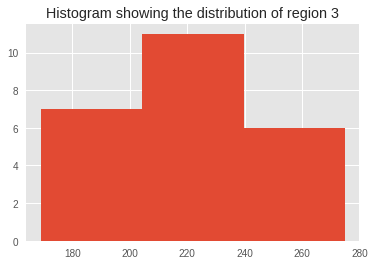

In [ ]:
for region in long_labels.keys():
  n_dist = pd.Series(long_labels[region])

  IQR = (n_dist.quantile(0.75) -  n_dist.quantile(0.25))
  bin_width = (2 * IQR)/(len(n_dist) ** (1/3))  
  binWidth = int(np.ceil((n_dist.max() - n_dist.min()) / bin_width))
  # plot the histogram
  plt.hist(long_labels[region], bins=binWidth)

  plt.title('Histogram showing the distribution of region ' + str(region))
  plt.show()
  print('\n')

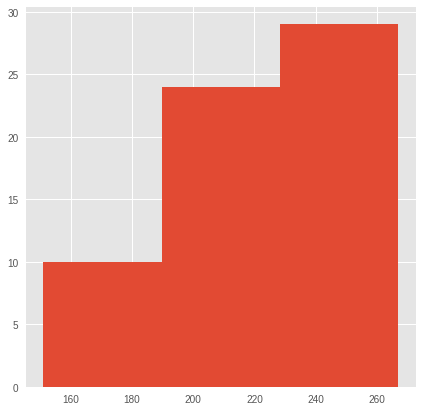

In [ ]:
bin_count = int(np.ceil(np.log2(len(n_dist))) + 1)
# histogram of long_labels[2]
fig = plt.figure(figsize=(7,7))
plt.hist(long_labels[5], bins=binWidth)
plt.show()

# Creation of negative pairs

In [ ]:
# Method 2
# Phase_1_5
used_pairs_1_5_D = {}
for num in range(201):
  # randomly pick index from phase 1, randomly pick index from phase 2
  index_1 = random.sample(long_labels[1], 1) 

  index_2 = random.sample(long_labels[2], 1) 
  
  pairs1_2L = [index_1[0], index_2[0]]
  pairs1_2 = tuple(sorted(pairs1_2L))

  # randomly pick index from phase 1, randomly pick index from phase 3
  index_3 = random.sample(long_labels[3], 1) 
  pairs1_3L = [index_1[0], index_3[0]]
  pairs1_3 = tuple(sorted(pairs1_3L))

  # randomly pick index from phase 1, randomly pick index from phase 4
  index_4 = random.sample(long_labels[4], 1) 
  pairs1_4L = [index_1[0], index_4[0]]
  pairs1_4 = tuple(sorted(pairs1_4L))

  # randomly pick index from phase 1, randomly pick index from phase 5
  index_5 = random.sample(long_labels[5], 1) 
  pairs1_5L = [index_1[0], index_5[0]]
  pairs1_5 = tuple(sorted(pairs1_5L))

  
  # ignoring duplicates
  if pairs1_2 not in used_pairs_1_5_D.keys():
    used_pairs_1_5_D[pairs1_2] = pairs1_2
    
  if pairs1_3 not in used_pairs_1_5_D.keys():
    used_pairs_1_5_D[pairs1_3] = pairs1_3

  if pairs1_4 not in used_pairs_1_5_D.keys():
    used_pairs_1_5_D[pairs1_4] = pairs1_4

  if pairs1_5 not in used_pairs_1_5_D.keys():
    used_pairs_1_5_D[pairs1_5] = pairs1_5
print(used_pairs_1_5_D)


{(11, 84): (11, 84), (11, 179): (11, 179), (11, 105): (11, 105), (11, 197): (11, 197), (14, 228): (14, 228), (14, 170): (14, 170), (14, 101): (14, 101), (14, 239): (14, 239), (88, 137): (88, 137), (137, 221): (137, 221), (9, 137): (9, 137), (137, 190): (137, 190), (18, 88): (18, 88), (18, 235): (18, 235), (18, 95): (18, 95), (18, 249): (18, 249), (40, 77): (40, 77), (40, 169): (40, 169), (40, 108): (40, 108), (40, 254): (40, 254), (13, 277): (13, 277), (13, 271): (13, 271), (13, 101): (13, 101), (13, 155): (13, 155), (1, 87): (1, 87), (1, 275): (1, 275), (1, 110): (1, 110), (1, 157): (1, 157), (10, 45): (10, 45), (10, 273): (10, 273), (10, 33): (10, 33), (10, 159): (10, 159), (2, 85): (2, 85), (2, 231): (2, 231), (2, 149): (2, 149), (2, 210): (2, 210), (41, 127): (41, 127), (41, 170): (41, 170), (41, 71): (41, 71), (41, 201): (41, 201), (135, 226): (135, 226), (135, 233): (135, 233), (58, 135): (58, 135), (135, 257): (135, 257), (165, 171): (165, 171), (165, 234): (165, 234), (148, 165

In [ ]:
# Phase_2_5
used_pairs_2_5 = set()
used_pairs_2_5_D = {}
for num in range(201):
  # randomly pick index from phase 2, randomly pick index from phase 3
  index_2 = random.sample(long_labels[2], 1) 

  index_3 = random.sample(long_labels[3], 1) 
             # helper function that defines the given pairs and returns back a tuple. 
  pairs2_3L =[index_2[0], index_3[0]]

  # convert the list to a tuple
  pairs2_3 = tuple(sorted(pairs2_3L))

  # randomly pick index from phase 2, randomly pick index from phase 4
  index_4 = random.sample(long_labels[4], 1) 
  pairs2_4L = [index_2[0], index_4[0]]

  # convert the list to a tuple
  pairs2_4 = tuple(sorted(pairs2_4L))

  # randomly pick index from phase 2, randomly pick index from phase 5
  index_5 = random.sample(long_labels[5], 1) 
  pairs2_5L = [index_2[0], index_5[0]]

  # convert the list to a tuple
  pairs2_5 = tuple(sorted(pairs2_5L))

  # convert the list to a tuple
  pairs = tuple(sorted(pairs2_4L))


  # ignoring duplicates
  if pairs2_3 not in used_pairs_2_5_D.keys():
    used_pairs_2_5_D[pairs2_3] = pairs2_3

  if pairs2_4 not in used_pairs_2_5_D.keys():
    used_pairs_2_5_D[pairs2_4] = pairs2_4
    
  if pairs2_5 not in used_pairs_2_5_D.keys():
    used_pairs_2_5_D[pairs2_5] = pairs2_5

print(len(used_pairs_2_5_D))

578


In [ ]:
# Phase_3_5
used_pairs_3_5_D = {}
for num in range(201):
  # randomly pick index from phase 3, randomly pick index from phase 4
  index_3 = random.sample(long_labels[3], 1) 

  index_4 = random.sample(long_labels[4], 1) 
             
  pairs3_4L = [index_3[0], index_4[0]]
  #print(pairs3_4L)

  # convert the list to a tuple
  pairs = tuple(sorted(pairs3_4L))
  
  # ignoring duplicates#
  if pairs not in used_pairs_3_5_D.keys():
    used_pairs_3_5_D[pairs] = pairs

  # randomly pick index from phase 3, randomly pick index from phase 5
  index_5 = random.sample(long_labels[5], 1) 
  pairs3_5L = [index_3[0], index_5[0]]

  # convert the list to a tuple
  pairs = tuple(sorted(pairs3_5L))

  # ignoring duplicates#
  if pairs not in used_pairs_3_5_D.keys():
    used_pairs_3_5_D[pairs] = pairs
    
print(len(used_pairs_3_5_D))

380


In [ ]:
# phase_4_5
used_pairs_4_5 = set()
used_pairs_4_5_D = {}
cnt=1
for num in range(201):
  # randomly pick index from phase 4, randomly pick index from phase 5
  index_4 = random.sample(long_labels[4], 1) 


  index_5 = random.sample(long_labels[5], 1) 
        
  pairs4_5L = [index_4[0], index_5[0]]
  
  # convert the list to a tuple
  pairs = tuple(sorted(pairs4_5L))
  
  # ignoring duplicates#
  if pairs not in used_pairs_4_5_D.keys():
    used_pairs_4_5_D[pairs] = pairs
  #  pass
  #else:
  #  used_pairs_4_5_D[pairs] = pairs

print(len(used_pairs_4_5_D))


200


In [ ]:
mergedList = list(used_pairs_1_5_D.values()) + list(used_pairs_2_5_D.values()) + list(used_pairs_3_5_D.values()) + list(used_pairs_4_5_D.values())
# double check to make sure that there are no duplicates
mergedL_without_duplicates = [num_pairs for num_pairs in (set(tuple(item) for item in mergedList))]
print('The total number of negative pairs is %s.' %len(mergedL_without_duplicates))

The total number of negative pairs is 1920.


In [ ]:
mergedL_without_duplicates[255]

(19, 189)

# Creation of positive pairs

In [ ]:
positive_pairs_D = {}
def drivePositivePairs(dictKey, num):
  """Function that randomly picks two number indexes from a dictionary key and inserts them into a dictionary of positive pairs"""
  pairs_num = random.sample(dictKey, num)

  # convert the list to a tuple
  pairs_num = tuple(sorted(pairs_num))

  if pairs_num not in positive_pairs_D.keys():
    positive_pairs_D[pairs_num]= pairs_num

  return None


In [ ]:
for num in range(401):
  # randomly pick 2 indexes from phase 1
  drivePositivePairs(long_labels[1], 2)

  # randomly pick 2 indexes from phase 2
  drivePositivePairs(long_labels[2], 2)

  # randomly pick 2 indexes from phase 3
  drivePositivePairs(long_labels[3], 2)

  # randomly pick 2 indexes from phase 4
  drivePositivePairs(long_labels[4], 2)

  # randomly pick 2 indexes from phase 5
  drivePositivePairs(long_labels[5], 2)

In [ ]:
# lets extract out the positive pairs into a list
positive_pairs_L = list(positive_pairs_D.values())
print('The number of positive pairs of indicies is %s.' %len(positive_pairs_L))

The number of positive pairs of indicies is 1651.


In [ ]:
# positive_pairs_D.keys()

In [ ]:
# positive_pairs_L

In [ ]:
# we generate pairs of negative signals using the generated pair of negative indicies.
negativeSignal_pairs= generatePosNegPairs(mergedL_without_duplicates, 'dissimilar')
print('The number of generated negative pairs of signals is %s.\n' %len(negativeSignal_pairs))

The number of generated negative pairs of signals is 1920.



In [ ]:
# we generate pairs of positive signals using the generated pairs of positive indicies.
positiveSignals_pairs = generatePosNegPairs(positive_pairs_L, 'similar')
print('The number of generated positive pairs of signals is %s.\n' %len(positiveSignals_pairs))

The number of generated positive pairs of signals is 1651.



In [ ]:
# let's modify the data structure
def modifyNegPosSignals(negativeSignal_pairs):
  """Function that transposes the individual tuple of signals, extracts out the labels and returns a list of transformed positive or negative signals"""
  negposSignal_pairs = []
  for i in range(len(negativeSignal_pairs)):
    transposedItems = negativeSignal_pairs[i][0].transpose()
    # print(transposedItems[:, 1], transposedItems[:, 1], negativeSignal_pairs[i][1])
    # negposSignal_pairs.append((transposedItems[:, 1], transposedItems[:, 1], negativeSignal_pairs[i][1]))
    negposSignal_pairs.append((transposedItems[:, 1], negativeSignal_pairs[i][1]))
    
  return negposSignal_pairs

In [ ]:
# use a helper function to modify the negative signals
negativeSignal_modified_pairs = modifyNegPosSignals(negativeSignal_pairs)
negativeSignal_modified_pairs_arr = np.asarray(negativeSignal_modified_pairs, dtype='object')
#negativeSignal_modified_pairs_arr[:, 1]

In [ ]:
# negativeSignal_modified_pairs_arr[:, 2]

In [ ]:
# use a helper function to modify the positive signals
positiveSignals_modified_pairs = modifyNegPosSignals(positiveSignals_pairs) 
positiveSignals_modified_pairs_arr = np.asarray(positiveSignals_modified_pairs, dtype='object')
#positiveSignals_modified_pairs_arr[:, 2]

# Creating pngs out of the XRD Sample data

In [ ]:
import os
os.chdir('/gdrive/MyDrive/CSC695/images')

In [ ]:
xrd_labels = [] # declare a list of phases to be assigned to each imaage
xrd_data = coordinate_list[1:]
print('The number of elements in the xrd_data list are %s.' %len(xrd_data))
# print('Image for just one XRD sample')
count = 0
SCREEN_DPI = 96
for i in range(len(xrd_data)):
  # print(xrd_data[i])

  xCoords = np.asarray(coordinate_list[0]).astype(float)
  # print(xCoords.shape)
  fig, ax1 = plt.subplots(figsize=(256/SCREEN_DPI, 256/SCREEN_DPI), dpi=SCREEN_DPI)
  
  ax1.set_xticks([])
  ax1.set_yticks([])
  
  ax1.grid(False)
  ax1.set_ylim([0, 1400])

  yCoords = np.asarray(xrd_data[i]).astype(float) 
  # print(len(yCoords))
  
  filename = 'image_' + str(count)

  # determine the phase the image belongs

  # check if the indice exists in the values of the long_label phases
  # note that long_label is a dictionary of keys (phases) and values, where each value is a list of indicies.
  if i in long_labels[1]:
    phase = 1
  elif i in long_labels[2]:
    phase = 2
  elif i in long_labels[3]:
    phase = 3
  elif i in long_labels[4]:
    phase = 4
  elif i in long_labels[5]:
    phase = 5
  else:
    phase = 0

  xrd_labels.append(phase) # append the phase to the list

  ax1.plot(xCoords, yCoords)
   
  xrdFileName = 'xrdImages/' + filename
  # save the figure to the file
  fig.savefig(xrdFileName, dpi=SCREEN_DPI)
  count += 1 

  # close the figure window
  plt.close(fig)

The number of elements in the xrd_data list are 278.


In [ ]:
#from matplotlib import image
# load the image as an array of pixels
#data = image.imread('xrdImages/image_0.png')
#print('Type of image data:  %s'%data.dtype)
#print('Shape of the image data for one image : %s' %str(data.shape))
# we have 256 pixels wide by 256 pixels high and four channels for the color


# Load all images in a directory as a list

In [ ]:
# loading grayscale formatted images
import matplotlib
from os import listdir
from matplotlib import image
from PIL import Image

# change to the working directory
os.chdir('/gdrive/MyDrive/CSC695/images/')

# load all image the currect directory
xrd_Images = []
count = 0
for fileName in listdir('xrdImages'):
  # full file name path
  file_to_be_converted = 'xrdImages/' + fileName

  # load the image
  # xrd_Image = image.imread(fileName)
  transformedFileName = 'grayScaleImages/' + fileName

  # convert the Image into grayscale
  xrd_Image = Image.open(file_to_be_converted).convert('L')
  xrd_Image.save(transformedFileName)

  # load the image 
  #test1 = Image.open('test1.png')
  #test1.show()

  # convert the image into a numpy array
  image_data = np.array(xrd_Image)

  # append the the image to a list
  xrd_Images.append(image_data)
  #print('loaded %s %s'%(fileName, image_data.shape))
  

In [ ]:
# convert the list of numpy arrays into arrays of arrays
xrd_images_np = np.array(xrd_Images).reshape(-1, 256, 256)

xrd_images_np = xrd_images_np.astype('float32')

xrd_images_np /= 255

In [ ]:
xrd_images_np.shape

(278, 256, 256)

# Loop through the positive and negative pairs and each time load pixel data for both images in the pair.

In [ ]:
# creation of positive pairs
imagePairs=[]
pos_neg_labels=[]
for ind in range(len(positive_pairs_L)):
  z1, z2 =  positive_pairs_L[ind][0], positive_pairs_L[ind][1]
  if z1 == 278 or z2 == 278:
    pass
  else:

      pairs = [xrd_images_np[z1], xrd_images_np[z2]]
      #print('pairs %s' %pairs)
      imagePairs.append(pairs)
      pos_neg_labels.append([1])

# creation of negative pairs
for ind in range(len(mergedL_without_duplicates)):
  z1, z2 =  mergedL_without_duplicates[ind][0], mergedL_without_duplicates[ind][1]
  if z1 == 278 or z2 == 278:
    pass
  else:

      pairs = [xrd_images_np[z1], xrd_images_np[z2]]
      #print('pairs %s' %pairs)
      imagePairs.append(pairs)
      pos_neg_labels.append([0])
imagePairs_np = np.asarray(imagePairs)
pos_neg_labels_np = np.asarray(pos_neg_labels)

In [ ]:
# shape of the numpy array
imagePairs_np.shape

(3541, 2, 256, 256)

In [ ]:
print('shape of column 0 : %s' %str(imagePairs_np[: , 0].shape))
print('shape of column 1 : %s' %str(imagePairs_np[: , 1].shape))
print('shape of the labels : %s' %str(pos_neg_labels_np.shape))

shape of column 0 : (3541, 256, 256)
shape of column 1 : (3541, 256, 256)
shape of the labels : (3541, 1)


# Generate a random order of elements

In order to minimise the variance and ensure that the model will generalise well to new, unseen data points we shuffle the arrays as shown below:

In [ ]:
# generate a random order of elements and index into the arrays imagePairs_np and pos_neg_labels with those
idx = np.random.permutation(imagePairs_np.shape[0])
imagePairs_np_sh, pos_neg_labels_np_sh = imagePairs_np[idx], pos_neg_labels_np[idx]

# lets randomly select 70% of the shuffled negative and positive signal pairs for training and remaining 30% for testing.

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =  train_test_split(imagePairs_np_sh, pos_neg_labels_np_sh, test_size=0.3, random_state=42)

In [ ]:
# shape of the X_train data set
X_train.shape

(2478, 2, 256, 256)

In [ ]:
# shape of the y_train data set
y_train.shape

(2478, 1)

In [ ]:
# flatten y_train
y_train_flatten = [y_train[i][0] for i in range(len(y_train.tolist()))]
y_train_flatten = np.array(y_train_flatten)
#y_train_flatten
y_train_flatten.shape

(2478,)

In [ ]:
# shape of X_test data set
X_test.shape

(1063, 2, 256, 256)

In [ ]:
# shape of the y_test data set
y_test.shape

(1063, 1)

In [ ]:
# flatten y_test
y_test_flatten = [y_test[i][0] for i in range(len(y_test.tolist()))]
y_test_flatten = np.array(y_test_flatten)
#y_train_flatten
y_test_flatten.shape

(1063,)

# Create and Compile the network to fit the training data with it.

In [ ]:
# size of the signal
# input_shape = (X_train.shape[2:])
input_shape = (X_train.shape[2:][0], X_train.shape[2:][1], 1)
print('input_shape : %s' %str(input_shape))

base_network = create_base_network(input_shape)
# commented out
input_a = Input(shape=input_shape)
print('input_a : %s' %input_a)
input_b = Input(shape=input_shape)
print('input_b : %s' %input_b)


# because we re-use the same instance `base_network`,
# the weights of the network
# will be shared across the two branches
# commented out when testing
processed_a = base_network(input_a)
processed_b = base_network(input_b)
print('processed_a : %s'%processed_a)
print('processed_b : %s'%processed_b)

# commented out when testing
distance = Lambda(euclidean_distance,
                  output_shape=eucl_dist_output_shape)([processed_a, processed_b])
#print(distance)

model = Model([input_a, input_b], distance) # think we are shaping our model. 

# train
# commented out
#rms = optimizers. RMSprop()
rms = optimizers.Adam()
#rms = SGD()

#### change back to rms??? wouldn't load in library
model.compile(loss=contrastive_loss, optimizer='adam', metrics=[accuracy])
# train the model
history = model.fit([X_train[:, 0], X_train[:, 1]], y_train_flatten,
                    # keep th batchsieze below 50 
          batch_size=50, 
         epochs=epochs,
          validation_data=([X_test[:, 0], X_test[:, 1]], y_test_flatten)
          )

input_shape : (256, 256, 1)
input_a : KerasTensor(type_spec=TensorSpec(shape=(None, 256, 256, 1), dtype=tf.float32, name='input_8'), name='input_8', description="created by layer 'input_8'")
input_b : KerasTensor(type_spec=TensorSpec(shape=(None, 256, 256, 1), dtype=tf.float32, name='input_9'), name='input_9', description="created by layer 'input_9'")
processed_a : KerasTensor(type_spec=TensorSpec(shape=(None, 128), dtype=tf.float32, name=None), name='model_4/lambda_4/l2_normalize:0', description="created by layer 'model_4'")
processed_b : KerasTensor(type_spec=TensorSpec(shape=(None, 128), dtype=tf.float32, name=None), name='model_4/lambda_4/l2_normalize:0', description="created by layer 'model_4'")
Epoch 1/50
50/50 [==============================] - 5s 78ms/step - loss: 0.4847 - accuracy: 0.4661 - val_loss: 0.4786 - val_accuracy: 0.4579
Epoch 2/50
50/50 [==============================] - 3s 65ms/step - loss: 0.3375 - accuracy: 0.4982 - val_loss: 0.3047 - val_accuracy: 0.4887
Epoch 3/

## plotting the accuracy and loss learning curves

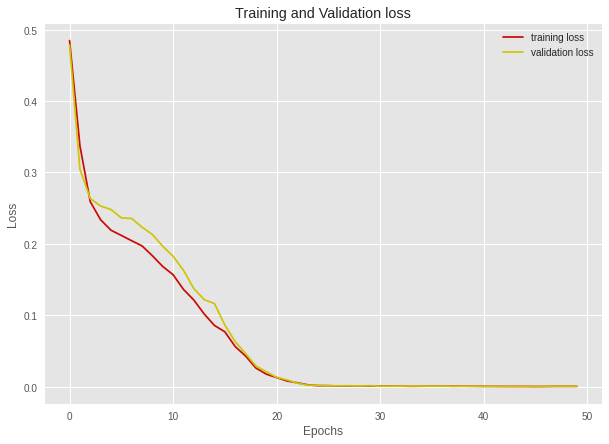

In [ ]:
plt.figure(figsize=(10, 7))
line_mse = plt.plot(range(0,epochs), model.history.history['loss'], 'r')
line_accuracy = plt.plot(range(0,epochs), model.history.history['val_loss'], '#cdc50a')
plt.title('Training and Validation loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['training loss', 'validation loss'])
print('\n')

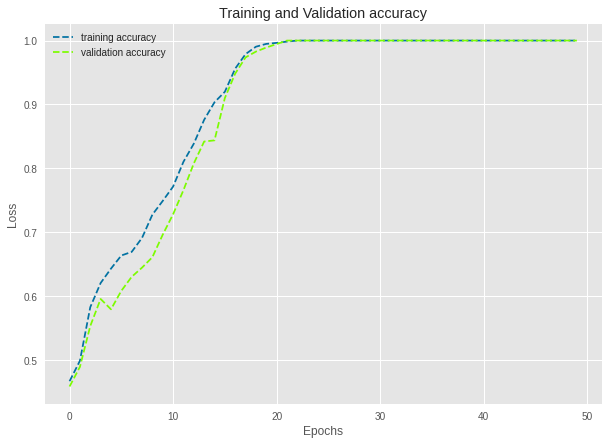

In [ ]:
plt.figure(figsize=(10, 7))
line_mse = plt.plot(range(0,epochs), model.history.history['accuracy'], linestyle = 'dashed', color = 'b')
line_accuracy = plt.plot(range(0,epochs), model.history.history['val_accuracy'],linestyle = 'dashed', color = '#7CFC00')
plt.title('Training and Validation accuracy')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['training accuracy', 'validation accuracy'])
print('\n')

In [ ]:
print('The training accuracy is %.4f'%max(model.history.history['accuracy']))
print('The validation accuracy is %.4f'%max(model.history.history['val_accuracy']))

The training accuracy is 1.0000
The validation accuracy is 1.0000


## Compute the final accuracy on training and validation sets

In [ ]:
y_pred_train_before = model.predict([X_train[:, 0], X_train[:, 1]])
y_pred_train = (y_pred_train_before - y_pred_train_before.min()) / (y_pred_train_before.max() - y_pred_train_before.min())

In [ ]:
train_acc = compute_accuracy(y_train_flatten, y_pred_train)

In [ ]:
y_pred_val_before = model.predict([X_test[:, 0], X_test[:, 1]])
y_pred_val = (y_pred_val_before - y_pred_val_before.min()) / (y_pred_val_before.max() - y_pred_val_before.min())

In [ ]:
val_acc = compute_accuracy(y_test_flatten, y_pred_val)

In [ ]:
print('* Accuracy on training set: %0.2f%%' % (100 * train_acc))
print('* Accuracy on validation set: %0.2f%%' % (100 * val_acc))

* Accuracy on training set: 100.00%
* Accuracy on validation set: 100.00%


In [ ]:
Xtest = X_test.reshape(-1, 256, 256, 1)
Xtest.shape

(2126, 256, 256, 1)

In [ ]:
y_test.shape

(1063, 1)

In [ ]:
# convert the list of numpy arrays into arrays of arrays
xrd_Images_l = np.array(xrd_Images)

xrd_Images_l = xrd_Images_l.astype('float32')

xrd_Images_l /= 255

xrd_Images_l.shape

(278, 256, 256)

In [ ]:
# shape of the entire data set
xrd_images_np.shape

(278, 256, 256)

In [ ]:
# reshape all the images
all_xrd_images = np.array(xrd_images_np).reshape(-1, 256, 256, 1)
all_xrd_images.shape

(278, 256, 256, 1)

In [ ]:
# sort the items of the dictionary by the key
sorted_long_labels = collections.OrderedDict(sorted(long_labels.items()))

In [ ]:
# convert the list of xrd phase labels to a numpy array
xrd_labels_np = np.array(xrd_labels)
xrd_labels_np.shape

(278,)

## Generating the embedding of the analysis

In [ ]:
# generate the embeddings on the 278 xrd images (training and testing)
generatedEmbeddings = base_network.predict(all_xrd_images)

embeddings = (generatedEmbeddings - generatedEmbeddings.min()) / (generatedEmbeddings.max() - generatedEmbeddings.min())
# instantiate a classifier object
nbc = KNeighborsClassifier(n_neighbors=2, metric='cosine')

#nbc.fit(embeddings, y_test_np_multiply_2)
nbc.fit(embeddings, xrd_labels_np)
# generate the predictions of the embeddings
y_pred_class = nbc.predict(embeddings)
accuracy_test = accuracy_score(y_true=xrd_labels_np, y_pred=y_pred_class)
print('The K-nearest Neighbor Classifier accuracy on the test data set is : %0.2f%%' %(accuracy_test * 100))

The K-nearest Neighbor Classifier accuracy on the test data set is : 100.00%


plot the representation learned from the network

In [ ]:
X_embedded = TSNE(n_components=2,random_state=2).fit_transform(embeddings)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



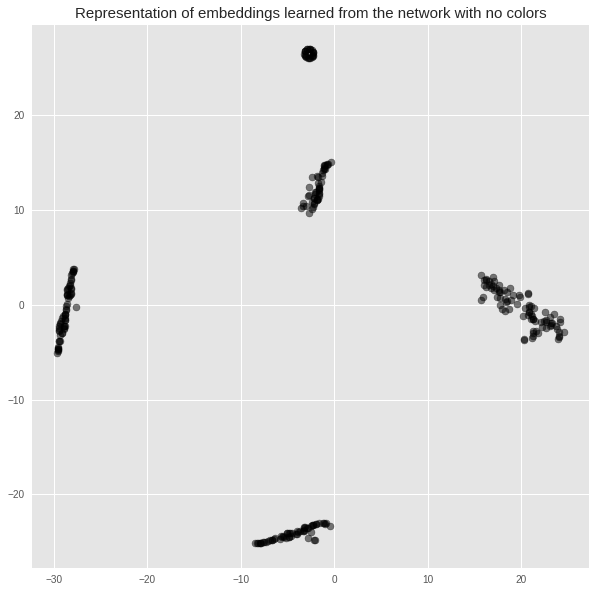

In [ ]:
# basic tsne with no colors
plt.figure(figsize=(10,10))
colors = {1 : '#1f77b4', 2 : '#ff7f0e', 3 : '#2ca02c', 4 : '#d62728', 5 : '#9467bd'}
for i in range(len(X_embedded)):
  plt.scatter(X_embedded[i,0],X_embedded[i,1],alpha=0.5, color='black')
plt.title('Representation of embeddings learned from the network with no colors', fontsize = 15)
#plt.legend(colors.keys(), bbox_to_anchor=(1.2, 0.6))
plt.show()


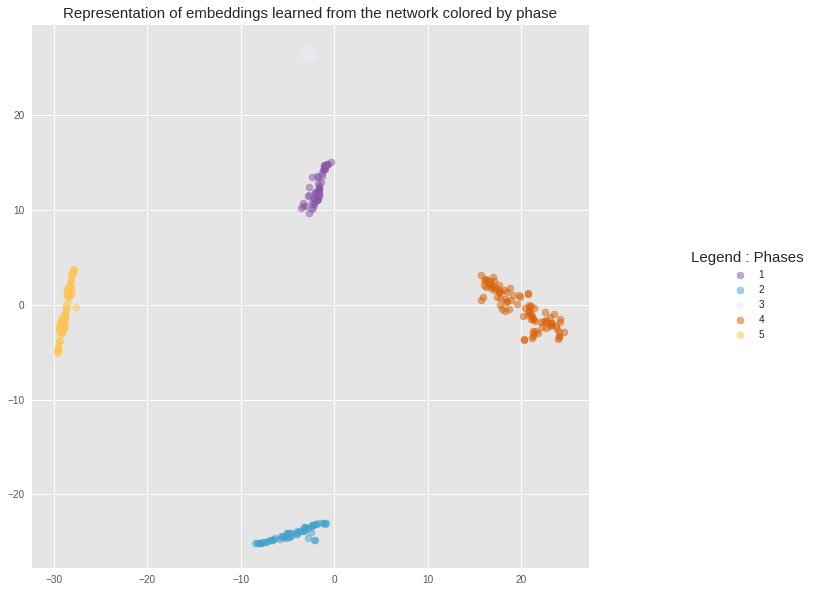

In [ ]:
# Representation of embeddings learned from the network colored by phase
plt.figure(figsize=(10,10))
colors = {0: '#2ca25f', 1 : '#8856a7', 2: '#43a2ca', 3 : '#ece7f2', 4 : '#d95f02', 5 : '#fec44f'}
for k, v in sorted_long_labels.items():
  inds = np.where(y_pred_class==k)[0]
  plt.scatter(X_embedded[inds,0], X_embedded[inds,1],  alpha = 0.5, color=colors[k])
plt.title('Representation of embeddings learned from the network colored by phase', fontsize = 15)
plt.legend(sorted_long_labels.keys(), bbox_to_anchor=(1.4, 0.6), title_fontsize = 15).set_title('Legend : Phases')
plt.show()

# Spectral Clustering. 

## Running Spectral clustering when k = 2

Number of embeddings used: 278


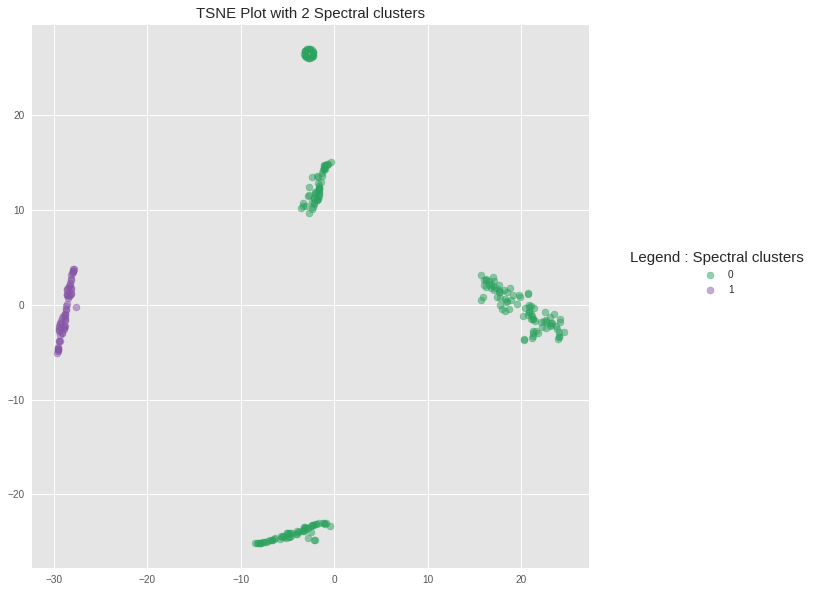




generated homogeneity score : 0.34336
generated completness score : 1.00000
silhouette score : 0.505163




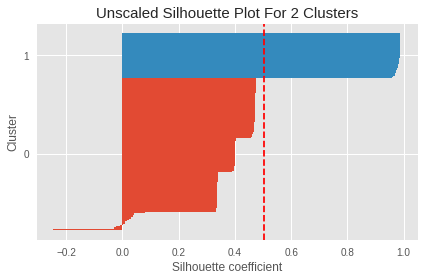

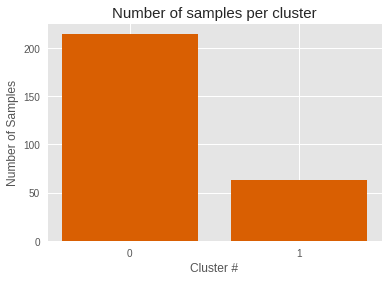



Number of samples per cluster shown below:


   Cluster No  Number of Samples
0           0                215
1           1                 63


In [ ]:
# helper function that initializes a spectral cluster with k number of clusters, 
# predicts the embeddings, plots the tsne with the spectral clusters, 
# computes the homogeneity, completeness and silhouette scores
deriveSpectralClustering(embeddings, X_embedded, 2)

The tsne plot is represented with only two clusters of the XRD images with a low homogeneity and silhouette scores. 

## Running Spectral clustering when k = 3

Number of embeddings used: 278


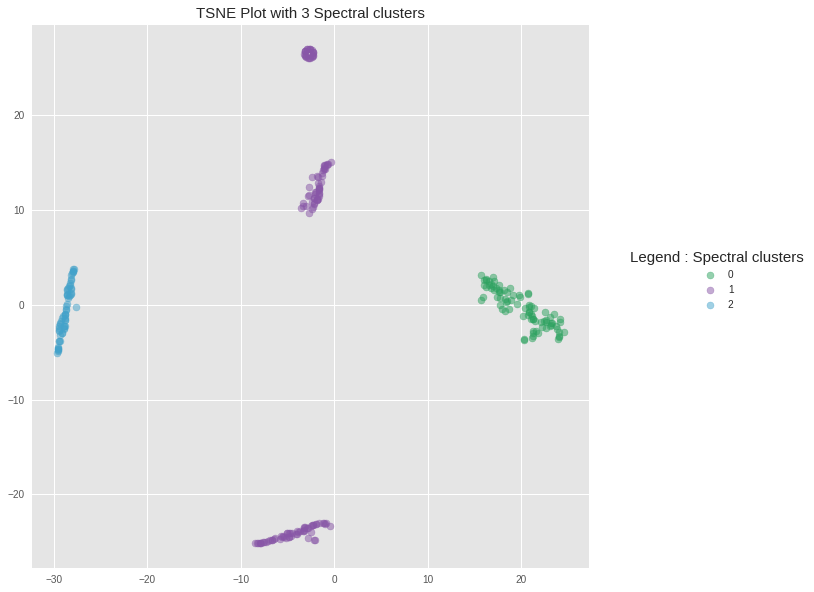




generated homogeneity score : 0.67635
generated completness score : 1.00000
silhouette score : 0.66374445




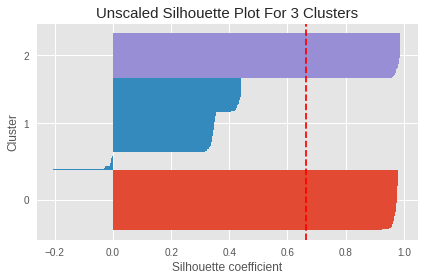

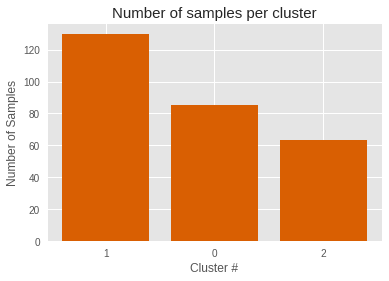



Number of samples per cluster shown below:


   Cluster No  Number of Samples
0           0                 85
1           1                130
2           2                 63


In [ ]:
# helper function that initializes a spectral cluster with k number of clusters, 
# predicts the embeddings, plots the tsne with the spectral clusters, 
# computes the homogeneity, completeness and silhouette scores
deriveSpectralClustering(embeddings, X_embedded, 3)

The tsne plot is represented with only three clusters of the XRD images. A silhouette score of 0.6 measures how similar the sample signals are to its own cluster (cohension) compared to other clusters (separation). A score of 0.6 is okay since it falls within the range of -1 to 1.  

## Running Spectral clustering when k = 4

Number of embeddings used: 278


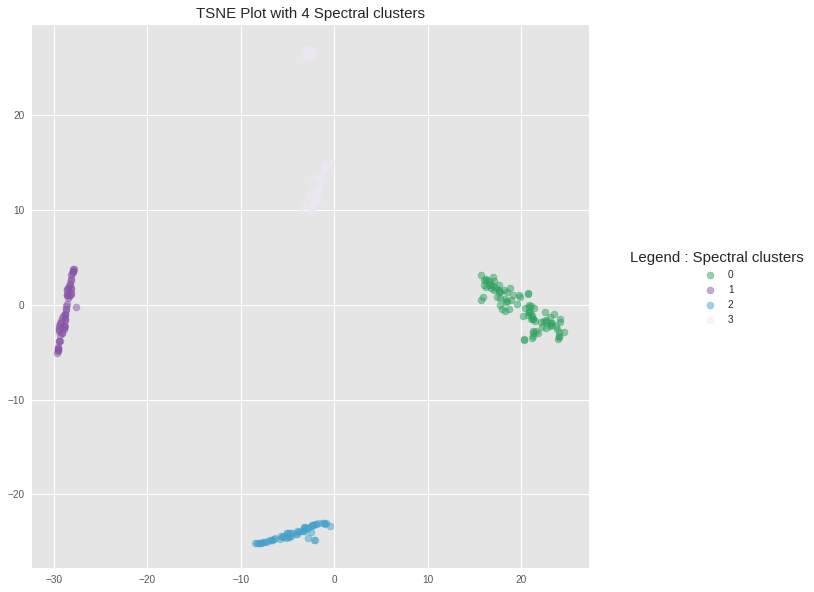




generated homogeneity score : 0.88257
generated completness score : 1.00000
silhouette score : 0.85716784




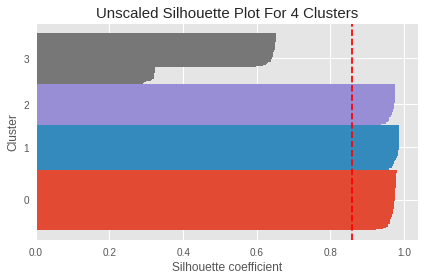

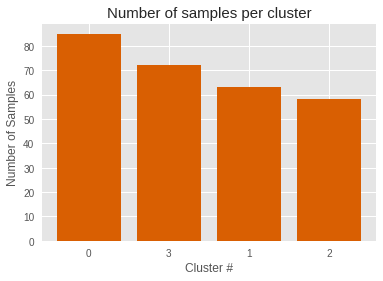



Number of samples per cluster shown below:


   Cluster No  Number of Samples
0           0                 85
1           1                 63
2           2                 58
3           3                 72


In [ ]:
# helper function that initializes a spectral cluster with k number of clusters, 
# predicts the embeddings, plots the tsne with the spectral clusters, 
# computes the homogeneity, completeness and silhouette scores
deriveSpectralClustering(embeddings, X_embedded, 4)

The tsne plot is represented with only four clusters of the XRD images.The homogeneity, completness and silhouette scores are high compared to the previous clusters, 2 and 3.

## Running Spectral clustering when k = 5

Number of embeddings used: 278


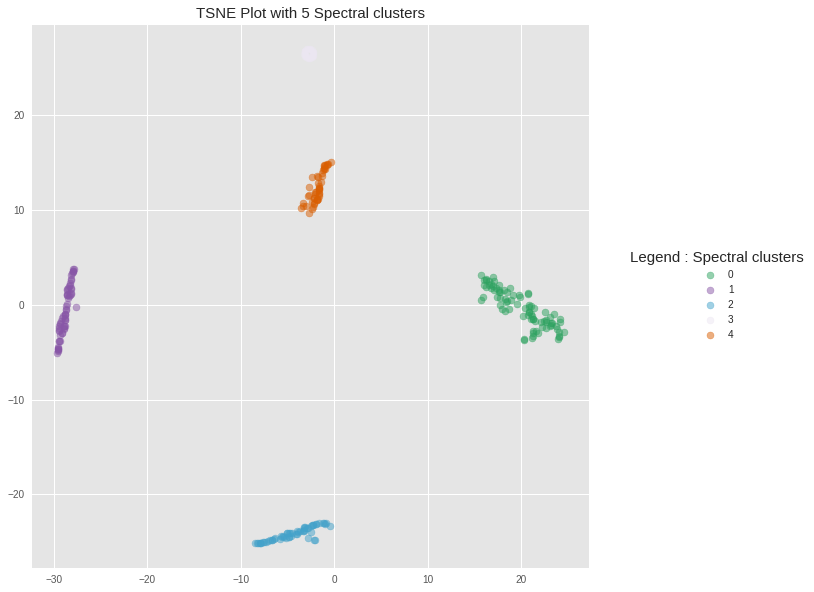




generated homogeneity score : 0.98834
generated completness score : 1.00000
silhouette score : 0.9684555




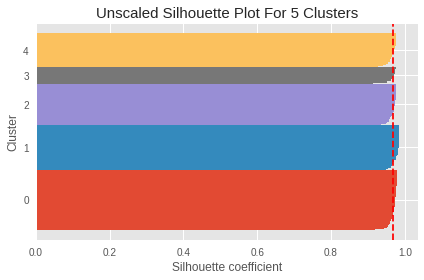

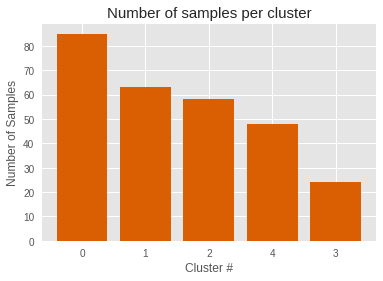



Number of samples per cluster shown below:


   Cluster No  Number of Samples
0           0                 85
1           1                 63
2           2                 58
3           3                 24
4           4                 48


In [ ]:
# helper function that initializes a spectral cluster with k number of clusters, 
# predicts the embeddings, plots the tsne with the spectral clusters, 
# computes the homogeneity, completeness and silhouette scores
deriveSpectralClustering(embeddings, X_embedded, 5)

The tsne plot is represented with only five clusters of the XRD images.The homogeneity, completness and silhouette scores are high compared to the previous clusters, 2, 3 and 4. Also, this is a well defined cluster with a high homogeneity, completness and silhouette scores. 

## Running Spectral clustering when k = 6

Number of embeddings used: 278


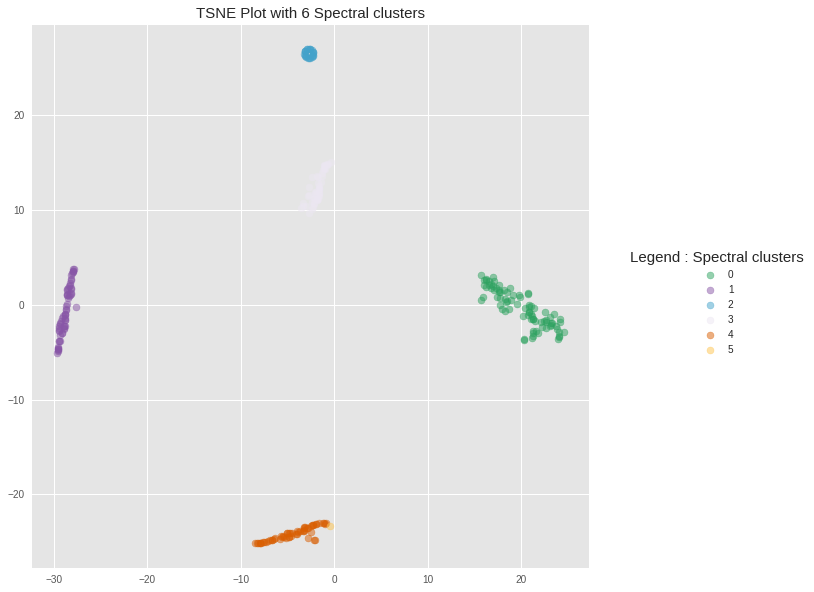




generated homogeneity score : 1.00000
generated completness score : 1.00000
silhouette score : 0.9636663




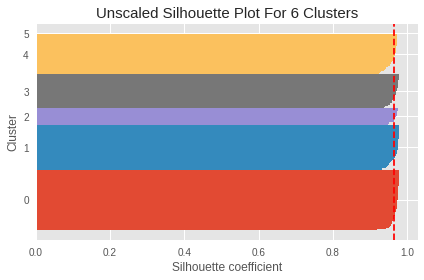

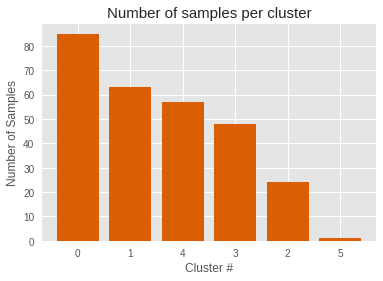



Number of samples per cluster shown below:


   Cluster No  Number of Samples
0           0                 85
1           1                 63
2           2                 24
3           3                 48
4           4                 57
5           5                  1


In [ ]:
# helper function that initializes a spectral cluster with k number of clusters, 
# predicts the embeddings, plots the tsne with the spectral clusters, 
# computes the homogeneity, completeness and silhouette scores
deriveSpectralClustering(embeddings, X_embedded, 6)

The tsne plot is represented with only six clusters of the XRD images. Some of the sample signals of the cluster number 5 are every where, which are likely to be noise.

## Running Spectral clustering when k = 7

Number of embeddings used: 278


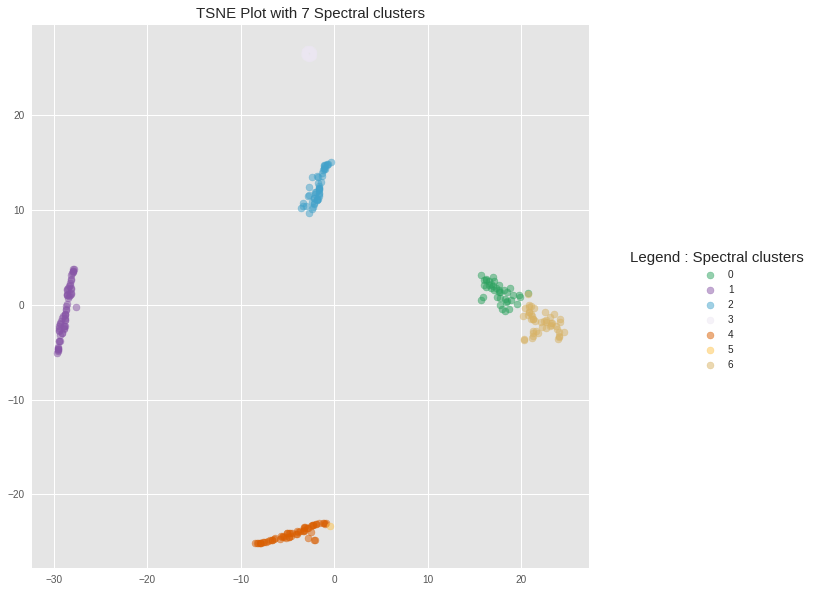




generated homogeneity score : 1.00000
generated completness score : 0.88082
silhouette score : 0.80593556




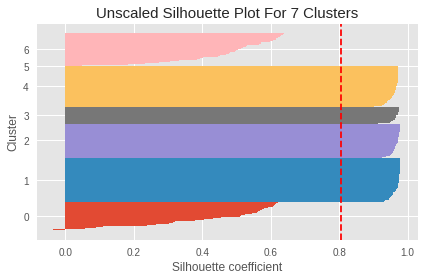

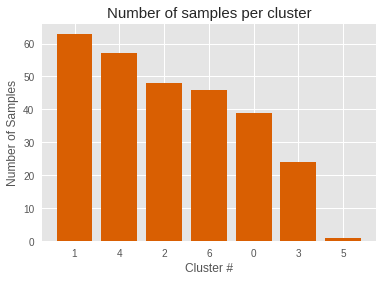



Number of samples per cluster shown below:


   Cluster No  Number of Samples
0           0                 39
1           1                 63
2           2                 48
3           3                 24
4           4                 57
5           5                  1
6           6                 46


In [ ]:
# helper function that initializes a spectral cluster with k number of clusters, 
# predicts the embeddings, plots the tsne with the spectral clusters, 
# computes the homogeneity, completeness and silhouette scores
deriveSpectralClustering(embeddings, X_embedded, 7)

The tsne plot is represented with only 7 clusters of the XRD images. Some of the sample signals of the cluster number 4, 5, and 6 are mixed with other clusters. The sample signals in the Cluster numbers of 4, 5, and 6 are likely to be either outliers or noise in the XRD data set. 

Amongst the different experiments of Spectral clustering I explored for the different values of k = 2, 3, 4, 5, 6, and 7. k = 5 clearly stands out with well defined clusters of sample signals. 